<a href="https://colab.research.google.com/github/sayaliKutwal/Computer-Vision-Nanodegree-Exercises/blob/master/1.%20Introduction%20to%20Computer%20Vision/3_Blue_Screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Threshold, Blue Screen

### Import resources

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

Pizza Image https://github.com/sayaliKutwal/CVND_Exercises/blob/master/1_1_Image_Representation/images/pizza_bluescreen.jpg

Background Image https://github.com/sayaliKutwal/CVND_Exercises/blob/master/1_1_Image_Representation/images/space_background.jpg

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# Download the image
import os
os.chdir('/gdrive/My Drive/000 Udacity Nanodegree/CVND/1. Introduction to Computer Vision')

# Read in nd display the image

In [13]:
# Read in the image
image = cv2.imread('pizza_bluescreen.jpg')

# Print the type of image data and dimensions 
print('This image is: ', type(image), ' with dimensions: ', image.shape)



This image is:  <class 'numpy.ndarray'>  with dimensions:  (514, 816, 3)


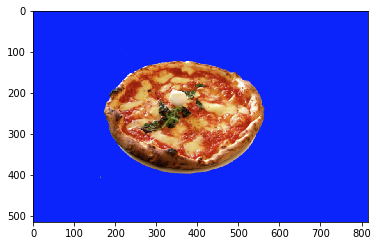

In [14]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB from BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

#Display the image copy
plt.imshow(image_copy)

# Define the color threshold

In [0]:
# Isolating blue backgroung
lower_blue = np.array([0,0,200])
upper_blue = np.array([250,250,255])


# Create a mask

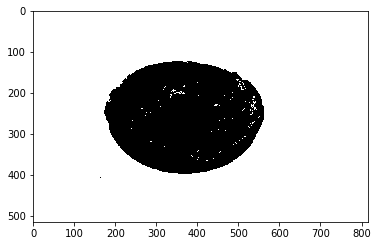

In [24]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap='gray')

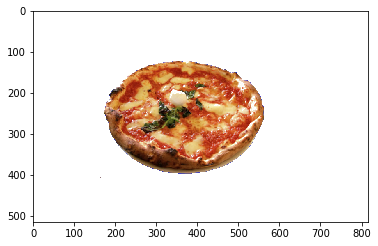

In [28]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [255, 255, 255]

# Display the image
plt.imshow(masked_image)

# Mask and add a background image

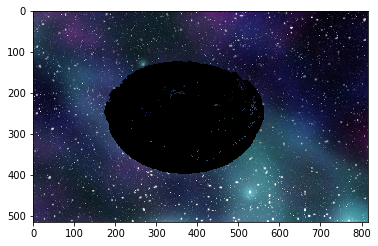

In [29]:
# Load in the backgroung image and convert it into RGB
bg_image = cv2.imread('space_background.jpg')
bg_image = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size
crop_bg = bg_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_bg[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_bg)

# Create a complete image

In [0]:
# Add two images 
complete_image = masked_image + crop_bg

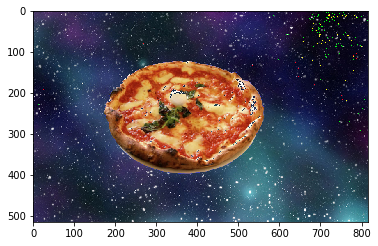

In [31]:
# Show the image
plt.imshow(complete_image)